# Classification in sci-kit learn

This code predicts the newsgroup from a list of 20 possible news groups. Its trainind on the commonly used 20-newsgroups dataset that is a "unusual" clasification dataset in that each newsgroup is very distinctive, leading to picking models that do better with this kind of data.

The code does the following:
1. counts words 
2. weight word count features with TFIDF weighting 
3. predict the newsgroup from the weighted features using a model

Code came from examples at:
1. http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
2. http://scikit-learn.org/stable/auto_examples/hetero_feature_union.html

20 newsgroups dataset info is at http://scikit-learn.org/stable/datasets/index.html#the-20-newsgroups-text-dataset

Be sure to install the following (pip3 is python 3 and pip command will also work):
1. `pip3 install sklearn`
2. `pip3 install pandas`
2. `pip3 install scipy`


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 
from IPython.core.display import display, HTML

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier

In [2]:
from sklearn.datasets import fetch_20newsgroups
#categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']
#categories = ['comp.graphics', 'sci.med']
categories=None
twenty_train = fetch_20newsgroups(subset='train',
    categories=categories, shuffle=True, random_state=42)

twenty_test = fetch_20newsgroups(subset='test',
    categories=categories, shuffle=True, random_state=42)

In [3]:
twenty_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
len(twenty_train.data)

11314

In [5]:
len(twenty_train.filenames)

11314

In [6]:
print(twenty_train.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [7]:
twenty_train.target

array([7, 4, 4, ..., 3, 1, 8])

In [8]:
twenty_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [9]:
print(twenty_test.data[0])

From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. GANDLER)
Subject: Need info on 88-89 Bonneville
Organization: University at Buffalo
Lines: 10
News-Software: VAX/VMS VNEWS 1.41
Nntp-Posting-Host: ubvmsd.cc.buffalo.edu


 I am a little confused on all of the models of the 88-89 bonnevilles.
I have heard of the LE SE LSE SSE SSEI. Could someone tell me the
differences are far as features or performance. I am also curious to
know what the book value is for prefereably the 89 model. And how much
less than book value can you usually get them for. In other words how
much are they in demand this time of year. I have heard that the mid-spring
early summer is the best time to buy.

			Neil Gandler



In [10]:
for t in twenty_train.target[:20]:
    print(twenty_train.target_names[t])

rec.autos
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.graphics
sci.space
talk.politics.guns
sci.med
comp.sys.ibm.pc.hardware
comp.os.ms-windows.misc
comp.sys.mac.hardware
rec.motorcycles
talk.religion.misc
comp.sys.mac.hardware
sci.space
misc.forsale
alt.atheism
comp.graphics
rec.autos
sci.electronics
comp.windows.x


## Imports

In [11]:

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape



(11314, 130107)

In [12]:
count_vect.vocabulary_

{'from': 56979,
 'lerxst': 75358,
 'wam': 123162,
 'umd': 118280,
 'edu': 50527,
 'where': 124031,
 'my': 85354,
 'thing': 114688,
 'subject': 111322,
 'what': 123984,
 'car': 37780,
 'is': 68532,
 'this': 114731,
 'nntp': 87620,
 'posting': 95162,
 'host': 64095,
 'rac3': 98949,
 'organization': 90379,
 'university': 118983,
 'of': 89362,
 'maryland': 79666,
 'college': 40998,
 'park': 92081,
 'lines': 76032,
 '15': 4605,
 'was': 123292,
 'wondering': 124931,
 'if': 65798,
 'anyone': 28615,
 'out': 90774,
 'there': 114579,
 'could': 42876,
 'enlighten': 51793,
 'me': 80638,
 'on': 89860,
 'saw': 104813,
 'the': 114455,
 'other': 90686,
 'day': 45295,
 'it': 68766,
 'door': 48618,
 'sports': 109581,
 'looked': 76718,
 'to': 115475,
 'be': 32311,
 'late': 74693,
 '60s': 16574,
 'early': 50111,
 '70s': 18299,
 'called': 37433,
 'bricklin': 34995,
 'doors': 48620,
 'were': 123796,
 'really': 99822,
 'small': 108252,
 'in': 66608,
 'addition': 26073,
 'front': 56989,
 'bumper': 35612,
 'se

In [13]:
text = ['The The rain in spain.', 'The brown fox.']
sparce_csr_vects = count_vect.transform(text)


In [14]:
sparce_csr_vects.data

array([1, 1, 1, 2, 1, 1, 1])

In [15]:
sparce_csr_vects.indptr

array([0, 4, 7], dtype=int32)

In [16]:
sparce_csr_vects.indices

array([ 66608,  99121, 109111, 114455,  35194,  56573, 114455], dtype=int32)

In [17]:
from scipy.sparse import coo_matrix
coo = coo_matrix(sparce_csr_vects)
np.stack((coo.row, coo.col, coo.data))

array([[     0,      0,      0,      0,      1,      1,      1],
       [ 66608,  99121, 109111, 114455,  35194,  56573, 114455],
       [     1,      1,      1,      2,      1,      1,      1]])

In [18]:
terms = np.array(list(count_vect.vocabulary_.keys()))
indices = np.array(list(count_vect.vocabulary_.values()))
inverse_vocabulary = terms[np.argsort(indices)]

for i in coo.col:
    print(i, inverse_vocabulary[i])


66608 in
99121 rain
109111 spain
114455 the
35194 brown
56573 fox
114455 the


In [19]:
words = [inverse_vocabulary[i] for i in coo.col]
df = pd.DataFrame({'row':coo.row, 'column':coo.col, 'count':coo.data, 'word':words})
columns = ['row','column', 'count', 'word']
df = df[columns]
df

,row,column,count,word
0,0,66608,1,in
1,0,99121,1,rain
2,0,109111,1,spain
3,0,114455,2,the
4,1,35194,1,brown
5,1,56573,1,fox
6,1,114455,1,the


In [20]:

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
                    ])

In [21]:
text_clf.fit(twenty_train.data, twenty_train.target)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [22]:
predicted = text_clf.predict(twenty_test.data)
np.mean(predicted == twenty_test.target) 

0.7738980350504514

In [23]:
text_clf = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-3, random_state=42,
                                            max_iter=5, tol=None)),
 ])
text_clf.fit(twenty_train.data, twenty_train.target)  
predicted = text_clf.predict(twenty_test.data)
np.mean(predicted == twenty_test.target)

0.82381837493361654

In [24]:
from sklearn import metrics
print(metrics.classification_report(twenty_test.target, predicted,
     target_names=twenty_test.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.73      0.72      0.72       319
           comp.graphics       0.80      0.70      0.74       389
 comp.os.ms-windows.misc       0.73      0.76      0.75       394
comp.sys.ibm.pc.hardware       0.71      0.70      0.70       392
   comp.sys.mac.hardware       0.83      0.81      0.82       385
          comp.windows.x       0.83      0.77      0.80       395
            misc.forsale       0.84      0.90      0.87       390
               rec.autos       0.92      0.89      0.91       396
         rec.motorcycles       0.92      0.96      0.94       398
      rec.sport.baseball       0.89      0.90      0.89       397
        rec.sport.hockey       0.88      0.99      0.93       399
               sci.crypt       0.83      0.96      0.89       396
         sci.electronics       0.83      0.60      0.70       393
                 sci.med       0.87      0.86      0.86       396
         

In [25]:
df = pd.DataFrame(metrics.confusion_matrix(twenty_test.target, predicted))
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,230,0,0,1,0,2,1,0,1,3,0,2,1,11,5,41,2,8,1,10
1,3,272,21,11,7,25,4,1,3,4,3,9,4,3,9,3,2,4,0,1
2,1,9,301,26,10,13,2,0,0,7,2,9,1,2,7,1,0,1,1,1
3,3,9,27,274,22,3,12,3,4,1,1,4,19,2,4,0,1,2,1,0
4,0,5,8,26,313,2,9,0,1,4,1,3,6,1,1,0,2,1,2,0
5,1,29,39,1,2,304,2,0,1,1,1,3,1,1,7,1,1,0,0,0
6,0,2,0,14,4,0,352,6,1,1,2,1,2,2,2,0,1,0,0,0
7,1,1,0,2,1,0,10,354,8,2,0,0,10,0,3,0,3,0,1,0
8,0,0,0,1,0,0,4,6,384,2,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,2,0,4,0,0,358,31,0,0,0,0,0,1,1,0,0


In [26]:
def header(str):
    display(HTML('<h3>'+str+'</h3>'))

tests = []

def test_pipeline(pipeline, name=None, verbose=True):
    pipeline.fit(twenty_train.data, twenty_train.target)  
    predicted = pipeline.predict(twenty_test.data)
    accuracy = np.mean(predicted == twenty_test.target)
    header('Accuracy')
    f1 = metrics.f1_score(twenty_test.target, predicted, average='macro') 
    print( 'accuracy = %.3f, F1 = %.3f' % (accuracy, f1))
    if(verbose):
        header('Classification Report')
        print(metrics.classification_report(twenty_test.target, predicted,
                 target_names=twenty_test.target_names))
        header('Confusion Matrix (row=expected, col=predicted)')
        df = pd.DataFrame(metrics.confusion_matrix(twenty_test.target, predicted))
        df.columns = twenty_test.target_names
        df['Expected']=twenty_test.target_names
        df.set_index('Expected',inplace=True)
        display(df)
   
    if name is not None:
        tests.append({'Name':name, 'Accuracy':accuracy, 'F1':f1, 'Details':pipeline.get_params(deep=True)})
    
test_pipeline(text_clf)


accuracy = 0.824, F1 = 0.811


                          precision    recall  f1-score   support

             alt.atheism       0.73      0.72      0.72       319
           comp.graphics       0.80      0.70      0.74       389
 comp.os.ms-windows.misc       0.73      0.76      0.75       394
comp.sys.ibm.pc.hardware       0.71      0.70      0.70       392
   comp.sys.mac.hardware       0.83      0.81      0.82       385
          comp.windows.x       0.83      0.77      0.80       395
            misc.forsale       0.84      0.90      0.87       390
               rec.autos       0.92      0.89      0.91       396
         rec.motorcycles       0.92      0.96      0.94       398
      rec.sport.baseball       0.89      0.90      0.89       397
        rec.sport.hockey       0.88      0.99      0.93       399
               sci.crypt       0.83      0.96      0.89       396
         sci.electronics       0.83      0.60      0.70       393
                 sci.med       0.87      0.86      0.86       396
         

,alt.atheism,comp.graphics,comp.os.ms-windows.misc,comp.sys.ibm.pc.hardware,comp.sys.mac.hardware,comp.windows.x,misc.forsale,rec.autos,rec.motorcycles,rec.sport.baseball,rec.sport.hockey,sci.crypt,sci.electronics,sci.med,sci.space,soc.religion.christian,talk.politics.guns,talk.politics.mideast,talk.politics.misc,talk.religion.misc
Expected,,,,,,,,,,,,,,,,,,,,
alt.atheism,230,0,0,1,0,2,1,0,1,3,0,2,1,11,5,41,2,8,1,10
comp.graphics,3,272,21,11,7,25,4,1,3,4,3,9,4,3,9,3,2,4,0,1
comp.os.ms-windows.misc,1,9,301,26,10,13,2,0,0,7,2,9,1,2,7,1,0,1,1,1
comp.sys.ibm.pc.hardware,3,9,27,274,22,3,12,3,4,1,1,4,19,2,4,0,1,2,1,0
comp.sys.mac.hardware,0,5,8,26,313,2,9,0,1,4,1,3,6,1,1,0,2,1,2,0
comp.windows.x,1,29,39,1,2,304,2,0,1,1,1,3,1,1,7,1,1,0,0,0
misc.forsale,0,2,0,14,4,0,352,6,1,1,2,1,2,2,2,0,1,0,0,0
rec.autos,1,1,0,2,1,0,10,354,8,2,0,0,10,0,3,0,3,0,1,0
rec.motorcycles,0,0,0,1,0,0,4,6,384,2,0,0,0,1,0,0,0,0,0,0


# TfidfVectorizer = CountVectorizer + TfidfTransformer

In [27]:
%%time 
test_pipeline(Pipeline([('tfidf_v', TfidfVectorizer()),
                      ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-4, random_state=42,
                                            max_iter=40, tol=None)),
                         ]), verbose=False)

accuracy = 0.854, F1 = 0.846
CPU times: user 7.99 s, sys: 103 ms, total: 8.09 s
Wall time: 8.1 s


In [28]:
%%time 
test_pipeline(Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-4, random_state=42,
                                            max_iter=40, tol=None)),
                         ]), verbose=False)

accuracy = 0.854, F1 = 0.846
CPU times: user 7.99 s, sys: 114 ms, total: 8.1 s
Wall time: 8.11 s


# Hyper-parameter tests on [SGDClassifier]( http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

In [29]:
test_pipeline(Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-4, random_state=42,
                                            max_iter=40, tol=None)),
                         ]), verbose=False, name='hinge loss')

accuracy = 0.854, F1 = 0.846


In [30]:
test_pipeline(Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', SGDClassifier(loss='log', penalty='l2',
                                            alpha=1e-6, random_state=42,
                                            max_iter=10, tol=None)),
                         ]), verbose=False, name='log loss')

accuracy = 0.847, F1 = 0.840


In [31]:
test_pipeline(Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', SGDClassifier(loss='log', penalty='none',
                                            alpha=1e-6, random_state=42,
                                            max_iter=10, tol=None)),
                         ]), verbose=False, name='log loss no regularization')

accuracy = 0.825, F1 = 0.819


# Tokenization Tests
Docs: 

[CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)  
[TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html)

In [32]:
test_pipeline(Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer(use_idf=False)),
                      ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-4, random_state=42,
                                            max_iter=40, tol=None)),
                         ]), verbose=False, name='use_idf=False')

accuracy = 0.815, F1 = 0.804


In [33]:
test_pipeline(Pipeline([('vect', CountVectorizer(stop_words='english')),
                      ('tfidf', TfidfTransformer()),
                      ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-4, random_state=42,
                                            max_iter=40, tol=None)),
                         ]), verbose=False, name='stopwords')

accuracy = 0.851, F1 = 0.844


In [34]:
test_pipeline(Pipeline([('vect', CountVectorizer(stop_words='english', ngram_range=(1,2))),
                      ('tfidf', TfidfTransformer()),
                      ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-4, random_state=42,
                                            max_iter=40, tol=None)),
                         ]), verbose=False, name='ngram_range=(1,2)')

accuracy = 0.856, F1 = 0.850


In [35]:
test_pipeline(Pipeline([('vect', CountVectorizer(stop_words='english')),
                      ('tfidf', TfidfTransformer(norm=None)),
                      ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-4, random_state=42,
                                            max_iter=40, tol=None)),
                         ]), verbose=False, name='norm = None')

accuracy = 0.753, F1 = 0.746


In [36]:
test_pipeline(Pipeline([('vect', CountVectorizer(stop_words='english')),
                      ('tfidf', TfidfTransformer(sublinear_tf=True)),
                      ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-4, random_state=42,
                                            max_iter=40, tol=None)),
                         ]), verbose=False, name='sublinear_tf=True')

accuracy = 0.859, F1 = 0.852


In [37]:
test_pipeline(Pipeline([('vect', CountVectorizer(stop_words='english')),
                      ('tfidf', TfidfTransformer(norm='l1')),
                      ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-4, random_state=42,
                                            max_iter=40, tol=None)),
                         ]), verbose=False, name='norm=l1')

accuracy = 0.823, F1 = 0.810


In [38]:
test_pipeline(Pipeline([('vect', CountVectorizer(stop_words='english', ngram_range=(1,3))),
                      ('tfidf', TfidfTransformer()),
                      ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-4, random_state=42,
                                            max_iter=40, tol=None)),
                         ]), verbose=False, name='ngram_range=(1,3)')

accuracy = 0.851, F1 = 0.845


In [39]:
test_pipeline(Pipeline([('vect', CountVectorizer(stop_words='english', ngram_range=(1,2), max_features=10000)),
                      ('tfidf', TfidfTransformer()),
                      ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-4, random_state=42,
                                            max_iter=40, tol=None)),
                         ]), verbose=False, name = 'max_features=10000')

accuracy = 0.819, F1 = 0.811


In [40]:
test_pipeline(Pipeline([('vect', CountVectorizer(stop_words='english', ngram_range=(1,2), max_df = 0.8, min_df=3)),
                      ('tfidf', TfidfTransformer()),
                      ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-4, random_state=42,
                                            max_iter=40, tol=None, n_jobs=-1)),
                         ]), verbose=False, name='max_df = 0.8, min_df=3')

accuracy = 0.856, F1 = 0.850


In [41]:
test_pipeline(Pipeline([('vect', CountVectorizer(stop_words='english', ngram_range=(1,2))),
                      ('tfidf', TfidfTransformer(sublinear_tf=True)),
                      ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-4, random_state=42,
                                            max_iter=40, tol=None, n_jobs=-1)),
                         ]), verbose=False, name='ngram + sublinear_tf')

accuracy = 0.866, F1 = 0.860


# SVM Model
[SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)    
[LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)

In [42]:
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
test_pipeline(Pipeline([('vect', CountVectorizer(stop_words='english')),
                      ('tfidf', TfidfTransformer()),
                      ('svd', TruncatedSVD(n_components=300)),
                      ('svc', SVC(kernel='linear', C=10)),
                         ]), verbose=False, name='SVC + TruncatedSVD')

accuracy = 0.787, F1 = 0.781


In [45]:
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
test_pipeline(Pipeline([('vect', CountVectorizer(stop_words='english')),
                      ('tfidf', TfidfTransformer()),
                      ('svc', SVC(kernel='linear')),
                         ]), verbose=False, name='SVC')

accuracy = 0.835, F1 = 0.830


In [43]:
from sklearn.svm import LinearSVC
from sklearn.decomposition import TruncatedSVD
test_pipeline(Pipeline([('vect', CountVectorizer(stop_words='english')),
                      ('tfidf', TfidfTransformer()),
                      ('clf', LinearSVC(C=10)),
                         ]), verbose=False, name='LinearSVC, C=10')

accuracy = 0.847, F1 = 0.841


In [44]:
from sklearn.svm import LinearSVC
from sklearn.decomposition import TruncatedSVD
test_pipeline(Pipeline([('vect', CountVectorizer(stop_words='english')),
                      ('tfidf', TfidfTransformer()),
                      ('clf', LinearSVC(C=1)),
                         ]), verbose=False, name='LinearSVC, C=1')

accuracy = 0.851, F1 = 0.845


# All Tests

In [46]:
tests_df=pd.DataFrame(tests, columns=['Name', 'F1', 'Accuracy', 'Details'])
tests_df = tests_df.set_index('Name')
tests_df = tests_df.sort_values(by=['F1'], ascending=False)
display(tests_df)

header('Best Model')
display(tests_df.head(1))
print(tests_df.values[0][2])

,F1,Accuracy,Details
Name,,,
ngram + sublinear_tf,0.859987,0.866437,"{'memory': None, 'steps': [('vect', CountVecto..."
sublinear_tf=True,0.852128,0.859400,"{'memory': None, 'steps': [('vect', CountVecto..."
"ngram_range=(1,2)",0.849884,0.856081,"{'memory': None, 'steps': [('vect', CountVecto..."
"max_df = 0.8, min_df=3",0.849690,0.855550,"{'memory': None, 'steps': [('vect', CountVecto..."
hinge loss,0.846033,0.853691,"{'memory': None, 'steps': [('vect', CountVecto..."
"LinearSVC, C=1",0.844743,0.851036,"{'memory': None, 'steps': [('vect', CountVecto..."
"ngram_range=(1,3)",0.844532,0.850903,"{'memory': None, 'steps': [('vect', CountVecto..."
stopwords,0.844401,0.851434,"{'memory': None, 'steps': [('vect', CountVecto..."
"LinearSVC, C=10",0.841163,0.846920,"{'memory': None, 'steps': [('vect', CountVecto..."


,F1,Accuracy,Details
Name,,,
ngram + sublinear_tf,0.859987,0.866437,"{'memory': None, 'steps': [('vect', CountVecto..."


{'memory': None, 'steps': [('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('tfidf', TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=True, use_idf=True)), ('clf', SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=40, n_iter=None,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False))], 'vect': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lo

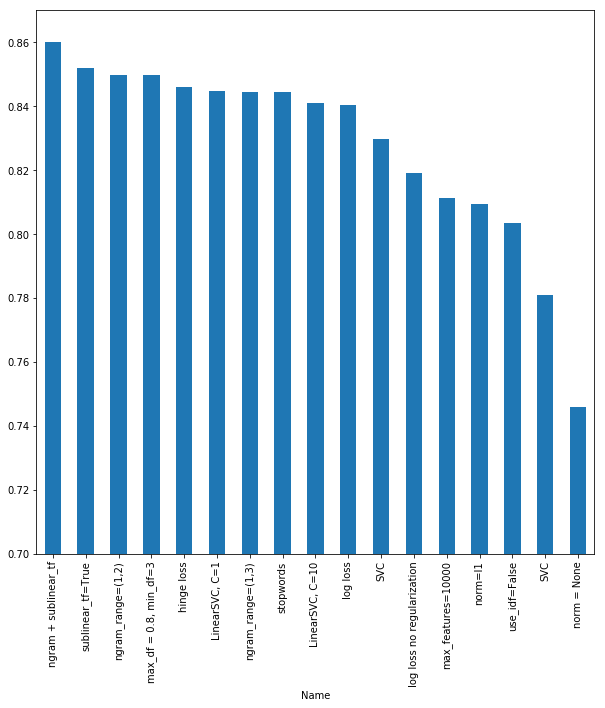

In [47]:
plt.figure(figsize=(10,10))
tests_df['F1'].plot(kind='bar', ylim=(0.7,0.87))